In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('./data/001_B16', sep = '\t')
#print(df)
#print(df.dtypes)
#print(df.ndim)
df

,Pixels,Unnamed: 1,Unnamed: 2,0,1,2,3,4,5,6,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,Wavelength,NaN,NaN,188.1951,188.2601,188.325,188.39,188.455,188.52,188.585,...,440.4061,440.4592,440.5123,440.5653,440.6184,440.6714,440.7245,440.7775,440.8305,440.8835
1,2019-11-13,10:04:19,11292195.0,566.0000,511.0000,540.000,455.00,573.000,431.00,521.000,...,5846.0000,7331.0000,7015.0000,3384.0000,1690.0000,1175.0000,1113.0000,979.0000,1126.0000,NaN
2,2019-11-13,10:04:19,11292208.0,565.0000,483.0000,519.000,478.00,580.000,428.00,553.000,...,5118.0000,6272.0000,5945.0000,3078.0000,1533.0000,1127.0000,1062.0000,892.0000,1029.0000,NaN
3,2019-11-13,10:04:19,11292223.0,555.0000,478.0000,523.000,452.00,571.000,411.00,513.000,...,5683.0000,6876.0000,6620.0000,3334.0000,1665.0000,1137.0000,1106.0000,970.0000,1143.0000,NaN
4,2019-11-13,10:04:19,11292238.0,573.0000,480.0000,506.000,469.00,582.000,450.00,538.000,...,5507.0000,6677.0000,6351.0000,3220.0000,1704.0000,1133.0000,1138.0000,949.0000,1086.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,2019-11-13,10:04:20,11299229.0,588.0000,512.0000,552.000,470.00,581.000,416.00,538.000,...,9360.0000,11531.0000,10973.0000,5666.0000,2757.0000,1626.0000,1475.0000,1378.0000,1441.0000,NaN
471,2019-11-13,10:04:20,11299244.0,550.0000,488.0000,547.000,436.00,612.000,427.00,554.000,...,9350.0000,11937.0000,11089.0000,5554.0000,2523.0000,1633.0000,1498.0000,1396.0000,1455.0000,NaN
472,2019-11-13,10:04:20,11299259.0,598.0000,521.0000,534.000,462.00,582.000,445.00,556.000,...,10092.0000,12853.0000,12103.0000,5889.0000,2640.0000,1610.0000,1470.0000,1297.0000,1438.0000,NaN
473,2019-11-13,10:04:20,11299274.0,572.0000,480.0000,506.000,464.00,616.000,426.00,562.000,...,10359.0000,12774.0000,12301.0000,6060.0000,2746.0000,1687.0000,1501.0000,1408.0000,1480.0000,NaN


In [2]:
df1=df.drop(columns=['Pixels'])
df1=df1.dropna(axis=1)
df1

,0,1,2,3,4,5,6,7,8,9,...,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094
0,188.1951,188.2601,188.325,188.39,188.455,188.52,188.585,188.65,188.7149,188.7799,...,440.353,440.4061,440.4592,440.5123,440.5653,440.6184,440.6714,440.7245,440.7775,440.8305
1,566.0000,511.0000,540.000,455.00,573.000,431.00,521.000,538.00,547.0000,510.0000,...,4005.000,5846.0000,7331.0000,7015.0000,3384.0000,1690.0000,1175.0000,1113.0000,979.0000,1126.0000
2,565.0000,483.0000,519.000,478.00,580.000,428.00,553.000,537.00,545.0000,518.0000,...,3547.000,5118.0000,6272.0000,5945.0000,3078.0000,1533.0000,1127.0000,1062.0000,892.0000,1029.0000
3,555.0000,478.0000,523.000,452.00,571.000,411.00,513.000,519.00,514.0000,505.0000,...,4010.000,5683.0000,6876.0000,6620.0000,3334.0000,1665.0000,1137.0000,1106.0000,970.0000,1143.0000
4,573.0000,480.0000,506.000,469.00,582.000,450.00,538.000,535.00,540.0000,521.0000,...,3813.000,5507.0000,6677.0000,6351.0000,3220.0000,1704.0000,1133.0000,1138.0000,949.0000,1086.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,588.0000,512.0000,552.000,470.00,581.000,416.00,538.000,524.00,593.0000,530.0000,...,6646.000,9360.0000,11531.0000,10973.0000,5666.0000,2757.0000,1626.0000,1475.0000,1378.0000,1441.0000
471,550.0000,488.0000,547.000,436.00,612.000,427.00,554.000,505.00,532.0000,516.0000,...,6478.000,9350.0000,11937.0000,11089.0000,5554.0000,2523.0000,1633.0000,1498.0000,1396.0000,1455.0000
472,598.0000,521.0000,534.000,462.00,582.000,445.00,556.000,537.00,555.0000,541.0000,...,6785.000,10092.0000,12853.0000,12103.0000,5889.0000,2640.0000,1610.0000,1470.0000,1297.0000,1438.0000
473,572.0000,480.0000,506.000,464.00,616.000,426.00,562.000,529.00,564.0000,524.0000,...,7237.000,10359.0000,12774.0000,12301.0000,6060.0000,2746.0000,1687.0000,1501.0000,1408.0000,1480.0000


In [3]:
data=df1.values
data

array([[ 188.1951,  188.2601,  188.325 , ...,  440.7245,  440.7775,
         440.8305],
       [ 566.    ,  511.    ,  540.    , ..., 1113.    ,  979.    ,
        1126.    ],
       [ 565.    ,  483.    ,  519.    , ..., 1062.    ,  892.    ,
        1029.    ],
       ...,
       [ 598.    ,  521.    ,  534.    , ..., 1470.    , 1297.    ,
        1438.    ],
       [ 572.    ,  480.    ,  506.    , ..., 1501.    , 1408.    ,
        1480.    ],
       [ 577.    ,  484.    ,  474.    , ..., 1589.    , 1499.    ,
        1565.    ]])

In [4]:
x= data[0]
y= data[1]

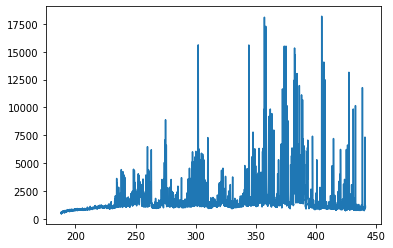

In [5]:
plt.plot(x,y)

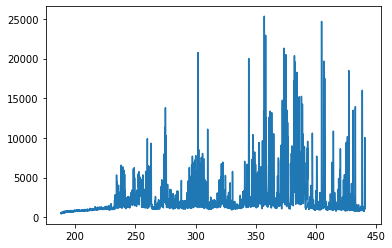

In [7]:
plt.plot(data[0], data[200])

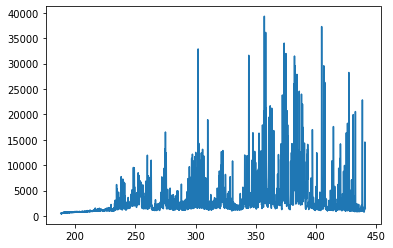

In [8]:
df = pd.read_csv('./data/002_B16_Zanardi_QS277us_200Hz_delay1us_exp1ms_no beam expander', sep = '\t')
df=df.drop(columns=['Pixels'])
df=df.dropna(axis=1)

data=df.values

plt.plot(data[0], data[400])

In [9]:
from glob import glob
filenames = glob('./data/0*')
dfs = [pd.read_csv(f,sep='\t') for f in filenames]
#type(dfs) #dfs is a list of dataframes 

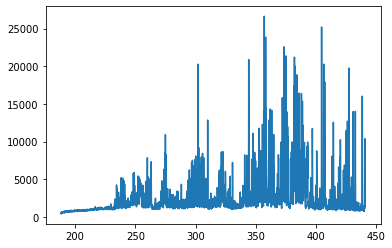

In [10]:
df=dfs[0].drop(columns=['Pixels'])
df=df.dropna(axis=1)
data=df.values
plt.plot(data[0], data[400])

In [94]:
df=dfs[2].drop(columns=['Pixels'])
df=df.dropna(axis=1)
ydf=df.drop([0, 1])
yval=ydf.values
yval

array([[ 568.,  471.,  507., ..., 1173., 1136., 1019.],
       [ 575.,  501.,  534., ..., 1152., 1117., 1025.],
       [ 589.,  502.,  549., ..., 1134., 1099., 1007.],
       ...,
       [ 588.,  496.,  504., ..., 1802., 1745., 1755.],
       [ 558.,  506.,  485., ..., 1721., 1651., 1623.],
       [ 550.,  476.,  571., ..., 1713., 1633., 1611.]])

In [51]:
X_std = StandardScaler().fit_transform(yval) #normalization
X_std

array([[-0.58260364, -1.53238358, -0.89092803, ..., -1.72498319,
        -1.67038003, -1.59719127],
       [-0.1245297 ,  0.18749692,  0.52672018, ..., -1.80399938,
        -1.74911676, -1.57508548],
       [ 0.79161819,  0.24482627,  1.31430252, ..., -1.87172754,
        -1.82370946, -1.64140285],
       ...,
       [ 0.72617906, -0.09914983, -1.0484445 , ...,  0.64173977,
         0.85333951,  1.11445201],
       [-1.23699499,  0.47414367, -2.04604879, ...,  0.33696305,
         0.46379988,  0.62812468],
       [-1.76050808, -1.24573683,  2.46942328, ...,  0.30686164,
         0.38920718,  0.58391311]])

In [93]:
"""mean_vec = np.mean(X_std, axis=0)
type(mean_vec)
len(mean_vec)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)"""

"mean_vec = np.mean(X_std, axis=0)\ntype(mean_vec)\nlen(mean_vec)\ncov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)\nprint('Covariance matrix \n%s' %cov_mat)"

In [54]:
cov_mat = np.cov(X_std.T) #covariance matrix
#print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

In [55]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[-1.39963667e-03, -3.82015775e-04, -3.83650086e-02, ...,
         5.33480905e-03, -1.62023533e-02, -4.03368072e-03],
       [-3.86931708e-04, -2.14253264e-03, -3.16576013e-02, ...,
         4.73886800e-03,  1.85954028e-03, -4.03408869e-04],
       [-1.57138108e-04,  1.28572145e-03, -4.17119270e-02, ...,
         2.67136484e-03, -1.08202630e-02, -1.28966613e-02],
       ...,
       [-1.69694473e-02, -7.12220578e-03,  4.00743021e-03, ...,
         9.76350681e-01, -3.26954419e-03, -3.67756519e-04],
       [-1.68321605e-02, -1.36318181e-02, -8.07990096e-05, ...,
        -4.47618134e-03,  9.68442265e-01, -2.61877293e-03],
       [-1.68006116e-02, -1.60836372e-02,  9.95458193e-04, ...,
        -2.23361548e-05, -2.27593517e-03,  9.75339487e-01]])

In [57]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [58]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3397.270856972886
123.55873739075201
20.087988797570894
13.29544066692238
4.541490183297178
3.8285563512272347
3.6157907430407965
3.484178089082932
3.4492753376872085
3.4210118234332807
3.378785588033377
3.346873093806672
3.289970343076529
3.280456547893304
3.258306045531505
3.2367304492130478
3.1857843842046445
3.159364948443834
3.1085285331705066
3.0852592802178513
3.074423830736717
3.0531981109803663
3.0211646631283897
2.9988902740619294
2.971553537957393
2.9538400331234302
2.9456318024513988
2.9311602787826025
2.9045475632218998
2.8622909900682156
2.8477466040860624
2.816015227403971
2.7896722404487426
2.7706018727203987
2.766382237619237
2.740380849231282
2.7032318709370413
2.6979125071918424
2.6663760729720685
2.6564727377588393
2.6528194547451065
2.6246452930960285
2.621270111365925
2.582543056443508
2.5764661610289425
2.570042935558486
2.543614794285967
2.5242665640556803
2.5143415674858316
2.4988623367008382
2.487055030646098
2.472339579940036


1.512413631013668e-14
1.512413631013668e-14
1.5103489014209972e-14
1.5103489014209972e-14
1.5102260993395707e-14
1.5102260993395707e-14
1.5101908619025527e-14
1.5101908619025527e-14
1.5077791993088323e-14
1.5077791993088323e-14
1.5062046929289214e-14
1.5062046929289214e-14
1.504874931233556e-14
1.504874931233556e-14
1.504873210393349e-14
1.504873210393349e-14
1.5044147171046015e-14
1.5044147171046015e-14
1.5023841651960003e-14
1.5023841651960003e-14
1.5015523173620573e-14
1.5015523173620573e-14
1.501545426968859e-14
1.501545426968859e-14
1.500689509360329e-14
1.500689509360329e-14
1.5005013015113164e-14
1.5005013015113164e-14
1.498405583224681e-14
1.498405583224681e-14
1.4979160878837086e-14
1.4979160878837086e-14
1.495350620683994e-14
1.495350620683994e-14
1.4947890910652276e-14
1.4947890910652276e-14
1.4946826162103803e-14
1.4946826162103803e-14
1.492399284754466e-14
1.492399284754466e-14
1.4875587600763218e-14
1.4875587600763218e-14
1.48654003056008e-14
1.48654003056008e-14
1.484914

1.1855136165444629e-14
1.1855136165444629e-14
1.1842613246034702e-14
1.1842613246034702e-14
1.1835591312679221e-14
1.1835591312679221e-14
1.18290762863288e-14
1.18290762863288e-14
1.1824240834857121e-14
1.1824240834857121e-14
1.1790820692534167e-14
1.1790820692534167e-14
1.1788437692400068e-14
1.1788437692400068e-14
1.1777447851390375e-14
1.1777447851390375e-14
1.1776040790584613e-14
1.1776040790584613e-14
1.1735235369554748e-14
1.1735235369554748e-14
1.1718941192240361e-14
1.1718941192240361e-14
1.1707506704720256e-14
1.1707506704720256e-14
1.170742373309964e-14
1.170742373309964e-14
1.1676456914352478e-14
1.1676456914352478e-14
1.161357211986192e-14
1.161357211986192e-14
1.1612756301139206e-14
1.1612756301139206e-14
1.160336213018388e-14
1.160336213018388e-14
1.1597163919307223e-14
1.1597163919307223e-14
1.1587922943331656e-14
1.1587922943331656e-14
1.1584234229582757e-14
1.1584234229582757e-14
1.1546870676415049e-14
1.1546870676415049e-14
1.1545862377892298e-14
1.1545862377892298e-1

In [59]:
tot = sum(eig_vals)
#print(tot)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
#print(cum_var_exp)

C:\Users\olivier.nicolini\.conda\envs\tf_env\lib\site-packages\matplotlib\transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
C:\Users\olivier.nicolini\.conda\envs\tf_env\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


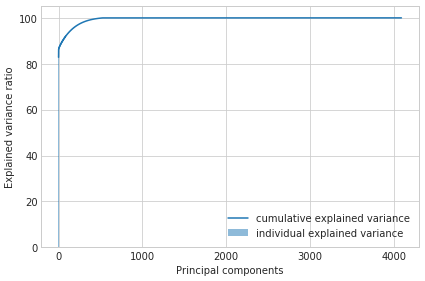

In [60]:
from matplotlib import pyplot as plt
import math

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4094), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(4094), cum_var_exp, where='mid', label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [92]:
df=dfs[0].drop(columns=['Pixels'])
df=df.dropna(axis=1)
ydf=df.drop([0, 1])
yval=ydf.values
yval
X_std = StandardScaler().fit_transform(yval)
X_std
pca = PCA(n_components=3)
PC=pca.fit(X_std)

principalComponents = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
#principalDf

In [87]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.82244512 0.02830262 0.00670768]
[1262.15004875  234.13744389  113.98396625]


In [91]:
df=dfs[1].drop(columns=['Pixels'])
df=df.dropna(axis=1)
ydf=df.drop([0, 1])
yval=ydf.values
yval
X_std = StandardScaler().fit_transform(yval)
X_std
pca = PCA(n_components=3)
PC=pca.fit(X_std)

principalComponents = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
#principalDf

In [89]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.82982264 0.03295934 0.00471681]
[1330.40975761  265.14412654  100.30371644]


In [90]:
df=dfs[2].drop(columns=['Pixels'])
df=df.dropna(axis=1)
ydf=df.drop([0, 1])
yval=ydf.values
yval
X_std = StandardScaler().fit_transform(yval)
X_std
pca = PCA(n_components=3)
PC=pca.fit(X_std)

principalComponents = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.82826885 0.03012414 0.00489754]
[1348.16167743  257.10683481  103.66809541]


In [ ]:
'''
pca2 = PCA(n_components=2)
PC=pca2.fit(X_std)

principalComponents2 = pca2.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents2, columns = ['principal component 1', 'principal component 2'])
principalDf
'''

**For the whole dataset**:

In [ ]:
for i in range(len(dfs)):
    df=dfs[i].drop(columns=['Pixels'])
    df=df.dropna(axis=1)
    data=df.values
    plt.plot(data[0], data[400])
#range(len(dfs))